In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from datetime import datetime
import os

In [2]:
# Initialize directories. Folders must exist prior to running code
InputPath = ".\Input"
OutputPath = ".\Output"

# Import file
file = "WeightTracker2.csv"
data = pd.read_csv(os.path.join(InputPath,file))
data.head()

,Month,Day,2018,2019,2020,2021,2022
0,January,1,78.0,73.0,NaN,63.35,64.85
1,January,2,80.0,72.0,67.0,62.85,64.70
2,January,3,77.0,72.0,67.0,63.80,64.25
3,January,4,77.0,70.0,66.0,63.70,64.45
4,January,5,76.0,69.5,66.0,63.30,63.75


## 1. Plot raw data in 1 series ##

In [3]:
# Convert dates into a usable format
# Convert date strings to datetime objects

# clear the variable for debugging purposes.
RawDate=None

year = data.columns[2:]

for i in range(len(year)):
    RawDate = pd.concat([RawDate,(data.columns[2+i] + "-" + data['Month'] + "-" + data['Day'].astype(str))], ignore_index=True)

date = [datetime.strptime(element, '%Y-%B-%d') for element in RawDate]

# check order
print(date[0])
print(date[364])
print(date[364+365])
print(date[364+365+365])
print(type(date))
print(type(date[1]))

2018-01-01 00:00:00
2018-12-31 00:00:00
2019-12-31 00:00:00
2020-12-31 00:00:00
<class 'list'>
<class 'datetime.datetime'>


In [4]:
# Create a dataset
DataFrame = None
DataFrame = pd.DataFrame(date, columns = ["Date"])

CumulativeData = None
CumulativeData = pd.DataFrame()

CumulativeData = pd.concat([CumulativeData,data[year]], axis=0, ignore_index=False)

#print(CumulativeData)
CumulativeData = pd.DataFrame(np.ravel(CumulativeData, order = "F"))
DataFrame["Data"] = CumulativeData
print(DataFrame.tail())

           Date  Data
1820 2022-12-27  65.7
1821 2022-12-28  65.6
1822 2022-12-29  67.7
1823 2022-12-30   NaN
1824 2022-12-31  65.3


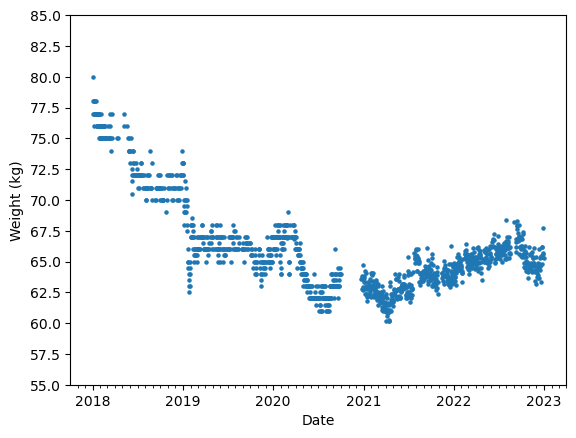

In [5]:
# plot the date as scatter plot
DataFrame.plot(kind="scatter", x = "Date", y = "Data", marker = ".")

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Weight (kg)')

# edit y-axis range
plt.ylim(55,85)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2.5))

# Make the x-axis label fancy
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

plt.show()

## 2. Plot raw data in multiple time series ##

In [6]:
# Initialize variables
CompiledAnnualData= None
years = data.columns[2:]


# Process data into a usable table
for i in range(len(years)):
    # Combine individual date data into one
    AnnualDate = data.columns[2+i] + "-" + data["Month"]  + "-" + data["Day"].astype(str)
    # Change dattime format from '2018-January-1' to '2018-01-01'
    AnnualDate = [datetime.strptime(i, "%Y-%B-%d").strftime("%Y-%m-%d") for i in AnnualDate]
    # Convert back to pandas.series type because pd.concat only works with pandas objects
    # it has to be series. dataframe objects make these extra indices that can't be removed
    AnnualDate = pd.Series(AnnualDate, index=None)
    # Make a yearly table with the date and weight data
    AnnualData = pd.concat([AnnualDate, data[years[i]]],axis=1,ignore_index=False, keys=["Date", years[i]])
    # Combines the yearly table into one big table spanning multiple years
    CompiledAnnualData = pd.concat([CompiledAnnualData, AnnualData],axis=1,ignore_index=False)

print(CompiledAnnualData.head()) # check

# Export Data
CompiledAnnualData.to_csv(os.path.join(OutputPath,"CompiledData"+years[-1]+".csv"))

# Convert to numpy for plotting
CAD_numpy = CompiledAnnualData.to_numpy()
#print((CAD_numpy[:,0]))



         Date  2018        Date  2019        Date  2020        Date   2021  \
0  2018-01-01  78.0  2019-01-01  73.0  2020-01-01   NaN  2021-01-01  63.35   
1  2018-01-02  80.0  2019-01-02  72.0  2020-01-02  67.0  2021-01-02  62.85   
2  2018-01-03  77.0  2019-01-03  72.0  2020-01-03  67.0  2021-01-03  63.80   
3  2018-01-04  77.0  2019-01-04  70.0  2020-01-04  66.0  2021-01-04  63.70   
4  2018-01-05  76.0  2019-01-05  69.5  2020-01-05  66.0  2021-01-05  63.30   

         Date   2022  
0  2022-01-01  64.85  
1  2022-01-02  64.70  
2  2022-01-03  64.25  
3  2022-01-04  64.45  
4  2022-01-05  63.75  


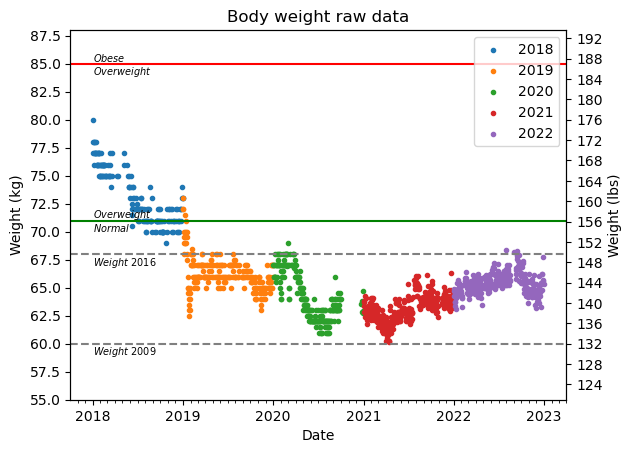

In [7]:
# Scatter plots
for i in range(0,len(years)*2,2):
    plt_date = [datetime.strptime(i, "%Y-%m-%d") for i in CAD_numpy[:,i]]
    plt.scatter(x=plt_date, y=CAD_numpy[:,i+1], marker=".")
    
# Make it pretty

# Add labels and title to the plot
plt.title("Body weight raw data")
plt.xlabel('Date')
plt.ylabel('Weight (kg)')

# Edit y-axis range
plt.ylim(55,88)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2.5))

# Make the x-axis label fancy
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.legend(years)

# Reference Markers
plt.axhline(y=85, color='r', linestyle='-') # Overweight threshold
plt.annotate("$ \it{Obese} $", fontsize=7, xy=(datetime(2018,1,1),85.0), xytext=(datetime(2018,1,1),85.2),textcoords='data')
plt.annotate("$ \it{Overweight} $", fontsize=7, xy=(datetime(2018,1,1),85.0), xytext=(datetime(2018,1,1),84),textcoords='data')
plt.annotate("$ \it{Overweight} $", fontsize=7, xy=(datetime(2018,1,1),71.0), xytext=(datetime(2018,1,1),71.2),textcoords='data')
plt.axhline(y=71, color='g', linestyle='-') # Normal threshold
plt.annotate("$ \it{Normal} $", fontsize=7, xy=(datetime(2018,1,1),71.0), xytext=(datetime(2018,1,1),70),textcoords='data')
plt.axhline(y=68, color='gray', linestyle='--') # Weight 2016, Masters
plt.annotate("$ \it{Weight} \ \it{2016} $", fontsize=7, xy=(datetime(2018,1,1),68.0), xytext=(datetime(2018,1,1),67),textcoords='data')
plt.axhline(y=60, color='gray', linestyle='--') # Weight 2009, High-school
plt.annotate("$ \it{Weight \ 2009} $", fontsize=7, xy=(datetime(2018,1,1),60.0), xytext=(datetime(2018,1,1),59),textcoords='data')

# Add lbs axis, must be here otherwise it intereferes with the reference markers
plt.twinx()
plt.ylim(55*2.2,88*2.2) # convert kg to pounds
plt.ylabel('Weight (lbs)')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(4))


# save figure
plt.savefig(os.path.join(OutputPath,"BodyWeight"+years[-1]+".png"), format="png", dpi=1000)

plt.show()

## 3. Plot average weight in multiple time series ##

In [256]:
# Initialize global variables
MonthlyData = None
CompiledMonthlyData= None
years = data.columns[2:]

# Function to determine the average, maximum, and minimum values per month
def monthly(i, AnnualData):

    # Initialize funcrtion variables
    MonthlyDataFunc=None
    currentMonth = 1
    validData = 0
    sumData=0
    avgData=[0]*12
    monthData=[]
    maxMonthData=[0]*12
    minMonthData=[0]*12

    # Determine the average, maximum, and minimum values per month
    for j in range(len(AnnualData["Date"])):

        # convert to datetime objects again for easier slicing
        dataMonth = datetime.strptime(AnnualData["Date"].iloc[j], "%Y-%m-%d").month
        dataDay = datetime.strptime(AnnualData["Date"].iloc[j], "%Y-%m-%d").day #for debugging

        if currentMonth == dataMonth:
            if not np.isnan(AnnualData[years[i]].iloc[j]):
                # Adds the current data if on the same month
                # increments a valid data counter i.e. not NaN
                # calculates the average based on the cumulative sum and the number of valid data points
                sumData += AnnualData[years[i]].iloc[j]
                validData += 1
                avgData[currentMonth-1] = sumData/validData

                # Adds current data to a month list
                # takes the maximum and minimum of that list
                # index of max and min list = month+1
                monthData.append(AnnualData[years[i]].iloc[j])
                maxMonthData[currentMonth-1]=max(monthData)
                minMonthData[currentMonth-1]=min(monthData)
        else:
            if not np.isnan(AnnualData[years[i]].iloc[j]):
                # If we move to a new month, we reset the variables below
                currentMonth+=1
                validData=1
                sumData=AnnualData[years[i]].iloc[j]
                avgData[currentMonth-1] = sumData/validData
                monthData=[]
                monthData.append(AnnualData[years[i]].iloc[j])
            else:
                # If the first data of the month is NaN, we set the variables below to zero
                currentMonth+=1
                validData=0
                sumData=0
                avgData[currentMonth-1] = 0
                monthData=[]
    # restart the month counter for the next iteration of i
    currentMonth=1

    avgData = pd.Series(avgData, name="AVG")
    maxMonthData = pd.Series(maxMonthData, name="Max")
    minMonthData = pd.Series(minMonthData, name="Min")
    MonthlyDataFunc = pd.concat([avgData,maxMonthData,minMonthData], axis=1,ignore_index=False)

    return MonthlyDataFunc


# Process data into a usable table
for i in range(len(years)):
    # Combine individual date data into one
    AnnualDate = data.columns[2+i] + "-" + data["Month"]  + "-" + data["Day"].astype(str)
    # Change dattime format from '2018-January-1' to '2018-01-01'
    AnnualDate = [datetime.strptime(i, "%Y-%B-%d").strftime("%Y-%m-%d") for i in AnnualDate]
    # Convert back to pandas.series type because pd.concat only works with pandas objects
    # it has to be series. dataframe objects make these extra indices that can't be removed
    AnnualDate = pd.Series(AnnualDate, index=None)
    # Make a yearly table with the date and weight data
    AnnualData = pd.concat([AnnualDate, data[years[i]]],axis=1,ignore_index=False, keys=["Date", years[i]])

    # Determine AVG, Max, Min per month
    MonthlyData = monthly(i, AnnualData)
    
    # Combines the yearly table into one big table spanning multiple years
    CompiledMonthlyData = pd.concat([CompiledMonthlyData,MonthlyData],axis=1,ignore_index=False)
    
print(CompiledMonthlyData)


          AVG   Max   Min        AVG   Max   Min        AVG   Max   Min  \
0   76.800000  80.0  75.0  67.600000  73.0  62.5  66.696429  68.0  64.0   
1   75.590909  77.0  75.0  66.538462  68.5  65.0  66.907143  68.0  64.0   
2   75.454545  77.0  74.0  66.586957  68.0  66.0  66.765000  69.0  64.0   
3   75.000000  75.0  75.0  66.552632  68.0  65.0  65.357143  67.0  64.0   
4   74.888889  77.0  73.0  66.400000  68.0  65.0  63.177419  64.0  62.0   
5   72.647059  75.0  70.5  66.250000  68.0  65.0  62.240000  64.0  61.5   
6   71.800000  73.0  71.0  66.625000  68.0  65.0  62.033333  63.0  61.0   
7   71.312500  74.0  70.0  66.363636  67.0  66.0  62.321429  64.0  61.0   
8   71.071429  72.0  70.0  66.312500  67.0  65.0  63.480769  66.0  62.0   
9   70.333333  72.0  69.0  65.088235  66.0  64.0   0.000000   0.0   0.0   
10  71.181818  72.0  70.0  64.750000  66.0  63.0   0.000000   0.0   0.0   
11  71.647059  74.0  70.0  65.717391  67.0  64.5  63.477778  64.7  62.7   

          AVG    Max    

In [231]:
currentMonth = 1
validData = 0
sumData=0
avgData=[0]*12
monthData=[]
maxMonthData=[0]*12
minMonthData=[0]*12

# Determine the average, maximum, and minimum values per month
for j in range(len(AnnualData["Date"])):
    dataMonth = datetime.strptime(AnnualData["Date"].iloc[j], "%Y-%m-%d").month
    dataDay = datetime.strptime(AnnualData["Date"].iloc[j], "%Y-%m-%d").day

    if currentMonth == dataMonth:
        if not np.isnan(AnnualData["2022"].iloc[j]):
            # Adds the current data if on the same month
            # increments a valid data counter i.e. not NaN
            # calculates the average based on the cumulative sum and the number of valid data points
            sumData += AnnualData["2022"].iloc[j]
            validData += 1
            avgData[currentMonth-1] = sumData/validData

            # Adds current data to a month list
            # takes the maximum and minimum of that list
            # index of max and min list = month+1
            monthData.append(AnnualData["2022"].iloc[j])
            maxMonthData[currentMonth-1]=max(monthData)
            minMonthData[currentMonth-1]=min(monthData)
    else:
        if not np.isnan(AnnualData["2022"].iloc[j]):
            # If we move to a new month, we reset the variables below
            currentMonth+=1
            validData=1
            sumData=AnnualData["2022"].iloc[j]
            avgData[currentMonth-1] = sumData/validData
            monthData=[]
            monthData.append(AnnualData["2022"].iloc[j])
        else:
            # If the first data of the month is NaN, we set the variables below to zero
            currentMonth+=1
            validData=0
            sumData=0
            avgData[currentMonth-1] = 0
            monthData=[]
# restart the month counter for the next iteration of i
currentMonth=1

print(avgData)
print(minMonthData)
print(maxMonthData)
# print(type(AnnualData))
# test = AnnualData.groupby(datetime.strptime(AnnualData["Date"].iloc[0], "%Y-%m-%d").strftime("%m"))
# print(data.head())
# q = data.groupby(["Month","2022"],as_index=False)["Month"].max()
# print(q)
# print(AnnualData["2022"].iloc[39])





[64.60322580645159, 65.00000000000001, 65.02777777777776, 65.09166666666667, 65.34464285714287, 66.01086956521738, 65.80517241379313, 66.27058823529413, 66.84166666666665, 65.35967741935485, 64.916, 64.89642857142857]
[63.1, 63.3, 64.0, 63.5, 64.5, 64.9, 64.95, 65.25, 65.45, 63.65, 63.45, 63.2]
[65.65, 66.4, 66.1, 66.2, 66.25, 67.2, 66.5, 68.4, 68.3, 67.4, 66.2, 67.7]


In [226]:
a=[]
a.append(1)
a

[1]

                0  2018               0  2019               0  2020  \
0  2018-January-1  78.0  2019-January-1  73.0  2020-January-1   NaN   
1  2018-January-2  80.0  2019-January-2  72.0  2020-January-2  67.0   
2  2018-January-3  77.0  2019-January-3  72.0  2020-January-3  67.0   
3  2018-January-4  77.0  2019-January-4  70.0  2020-January-4  66.0   
4  2018-January-5  76.0  2019-January-5  69.5  2020-January-5  66.0   

                0   2021               0   2022  
0  2021-January-1  63.35  2022-January-1  64.85  
1  2021-January-2  62.85  2022-January-2  64.70  
2  2021-January-3  63.80  2022-January-3  64.25  
3  2021-January-4  63.70  2022-January-4  64.45  
4  2021-January-5  63.30  2022-January-5  63.75  


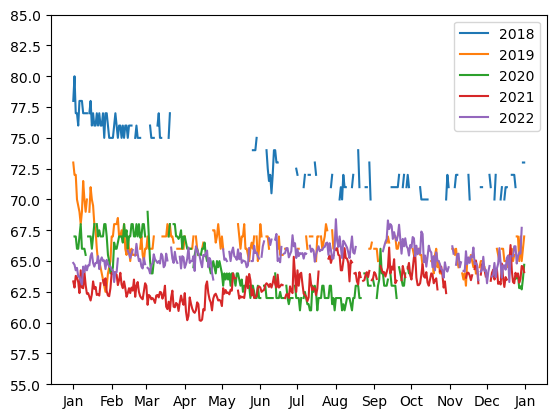

In [35]:
0# Second attempt
# I will make a date dependent data annually instead of just a whole list.
CompiledAnnualData= None
years = data.columns[2:]
AnnualDate = data.columns[2] + "-" + data["Month"]  + "-" + data["Day"].astype(str)

for i in range(len(years)):
    AnnualDate = data.columns[2+i] + "-" + data["Month"]  + "-" + data["Day"].astype(str)
    AnnualData = pd.concat([AnnualDate, data[years[i]]],axis=1,ignore_index=False)
    #print(AnnualData.head())
    #test = pd.DataFrame(np.ravel([test, AnnualData], order = "F"))
    CompiledAnnualData = pd.concat([CompiledAnnualData, AnnualData],axis=1,ignore_index=False)
print(CompiledAnnualData.head())

#CompiledAnnualData.plot(kind = "scatter", x = 0, y = '2018')
CompiledAnnualData.plot()

# edit y-axis range
plt.ylim(55,85)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(2.5))

# Make the x-axis label fancy
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
#plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())


In [9]:
DataFrame.head()

,Date,Data
0,2018-01-01,78.0
1,2018-01-02,80.0
2,2018-01-03,77.0
3,2018-01-04,77.0
4,2018-01-05,76.0


In [10]:
x = (data['Month']) + " "+ data['Day'].astype(str)
print(x)

0        January 1
1        January 2
2        January 3
3        January 4
4        January 5
          ...     
360    December 27
361    December 28
362    December 29
363    December 30
364    December 31
Length: 365, dtype: object


In [11]:
y = data['2018']
print(y)

0      78.0
1      80.0
2      77.0
3      77.0
4      76.0
       ... 
360     NaN
361    73.0
362     NaN
363    73.0
364    73.0
Name: 2018, Length: 365, dtype: float64


ValueError: x and y must be the same size

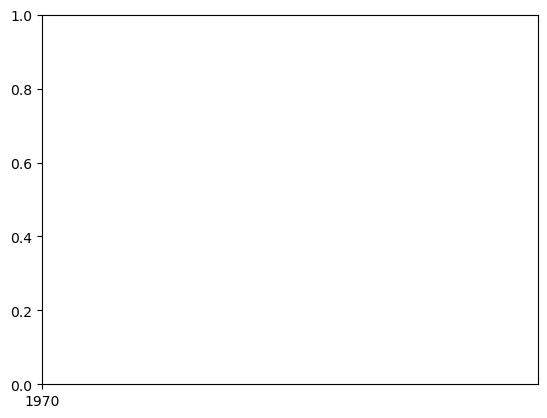

In [12]:
x = date
# Set the x-axis tick intervals
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

plt.scatter(x,y)